In [720]:
import requests
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

%matplotlib inline

In [ ]:
# total_confirmed = requests.get('https://covid.ourworldindata.org/data/total_cases.csv')
# total_deaths = requests.get('https://covid.ourworldindata.org/data/total_deaths.csv')
# new_confirmed = requests.get('https://covid.ourworldindata.org/data/new_cases.csv')
# new_deaths = requests.get('https://covid.ourworldindata.org/data/new_deaths.csv')
full_dataset = requests.get('https://covid.ourworldindata.org/data/full_data.csv')

In [ ]:
# with open('./total_confirmed.csv', 'wb') as f:
#     f.write(total_confirmed.content)
    
# with open('./total_deaths.csv', 'wb') as f:
#     f.write(total_deaths.content)
    
# with open('./new_confirmed.csv', 'wb') as f:
#     f.write(new_confirmed.content)
    
# with open('./new_deaths.csv', 'wb') as f:
#     f.write(new_deaths.content)
    
with open('./full_dataset.csv', 'wb') as f:
    f.write(full_dataset.content)

In [ ]:
full_dataset = pd.read_csv('full_dataset.csv', parse_dates=['date'])
full_dataset.head()

In [ ]:
full_dataset = full_dataset.fillna(0)
full_dataset.head()

In [ ]:
full_dataset.info()

In [ ]:
full_dataset = full_dataset.sort_values(['date', 'total_cases'])

In [ ]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

In [ ]:
world_dataset = full_dataset[full_dataset.location == 'World']
full_dataset = full_dataset[full_dataset.location != 'World']

In [ ]:
full_dataset[full_dataset.total_cases == full_dataset.total_cases.max()]

## Worldwide Corona cases 

In [ ]:
plt.figure(figsize = (24, 10))

ax = sns.lineplot(x="date", y="total_cases", markers=True, data=world_dataset)
ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))


In [ ]:
no_china_dataset = full_dataset[full_dataset.location != 'China']

In [ ]:
highest_countries = no_china_dataset.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries

## Cases of Corona virus excluding China

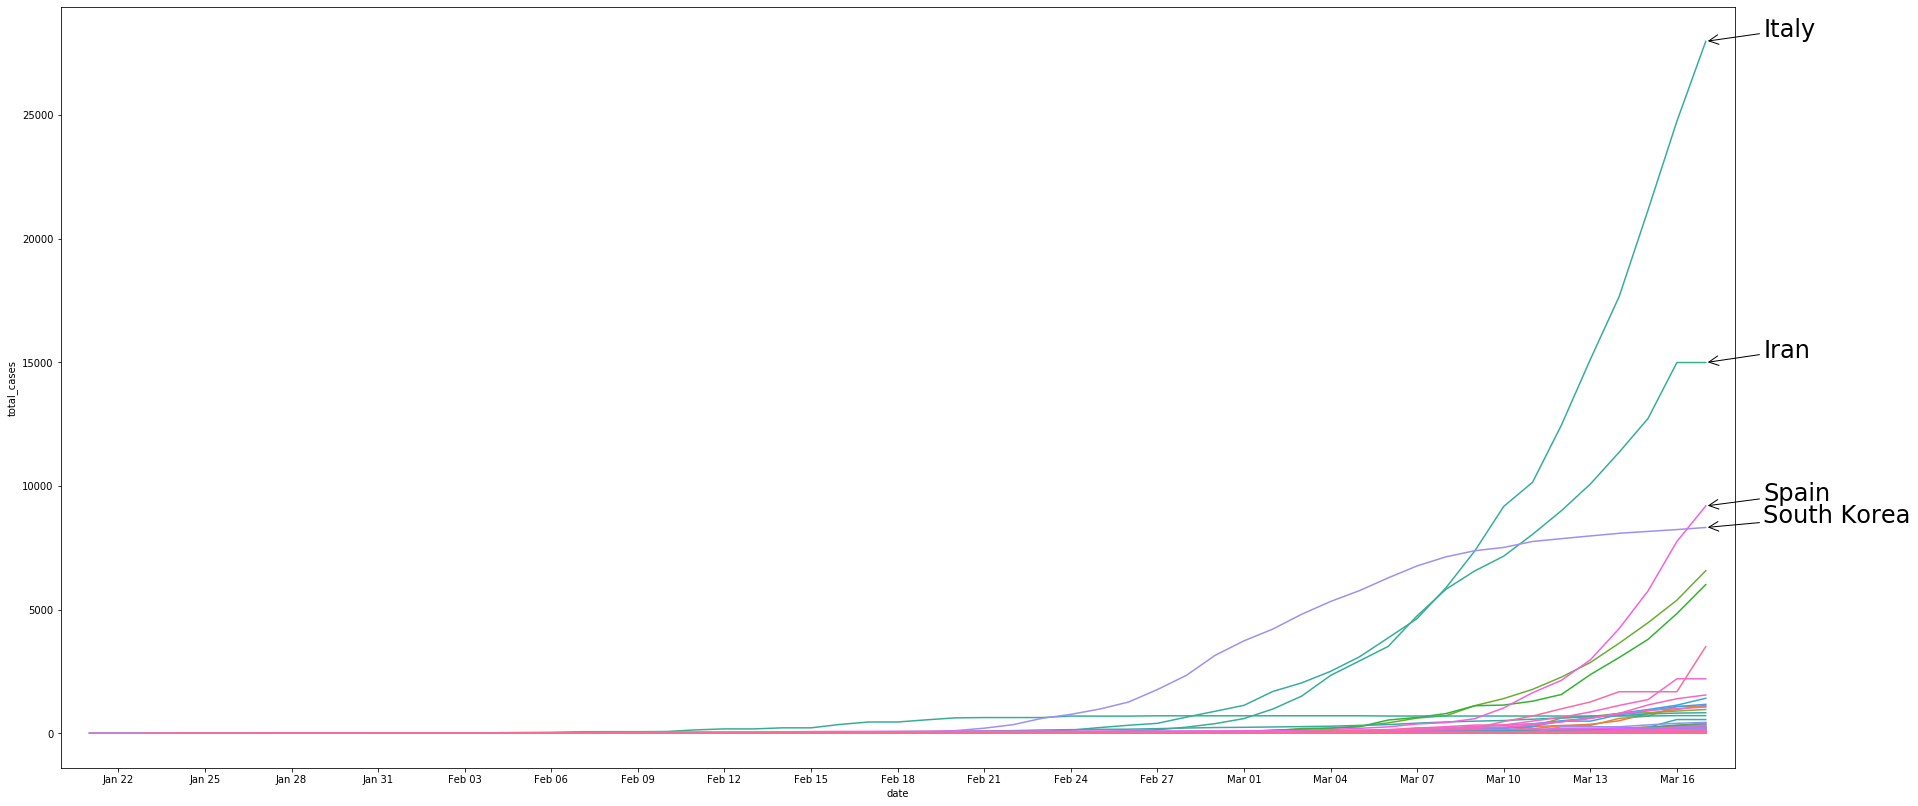

In [736]:

plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(highest_countries.iloc[i].location, 
                xy=(no_china_dataset.date.max(), highest_countries.iloc[i].total_cases), fontsize=24,
                xytext=(no_china_dataset.date.max() + datetime.timedelta(days=2),
                        highest_countries.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



## Same as above  but no arrows 

In [ ]:
plt.figure(figsize = (30, 14))


ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_china_dataset)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_china_dataset.date.min() - datetime.timedelta(days=1), no_china_dataset.date.max() + datetime.timedelta(days=6)])


for line in range(0,highest_countries.shape[0]):
     ax.text(highest_countries.date[line] + datetime.timedelta(days=0.5), highest_countries.total_cases[line], highest_countries.location[line], horizontalalignment='left', size='20', color='black', weight='bold')
        


In [ ]:
highest_countries_last_week

## Cases of Corona virus excluding China last week

In [ ]:
plt.figure(figsize = (30, 14))

one_week_ago = no_china_dataset[no_china_dataset.date < '2020-03-7']
highest_countries_last_week = one_week_ago.nlargest(4, ['date', 'total_cases']).reset_index()
highest_countries_last_week

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=one_week_ago)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([one_week_ago.date.min() - datetime.timedelta(days=1), one_week_ago.date.max() + datetime.timedelta(days=1)])

for i in range(highest_countries_last_week.shape[0]):
    ax.annotate(highest_countries_last_week.iloc[i].location, 
                xy=(one_week_ago.date.max(), highest_countries_last_week.iloc[i].total_cases), fontsize=24,
                xytext=(one_week_ago.date.max() + datetime.timedelta(days=2),
                        highest_countries_last_week.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

In [ ]:
no_outliers = no_china_dataset[~ no_china_dataset.location.isin(highest_countries.location)]
highest_no_outliers = no_outliers.nlargest(10, ['date', 'total_cases']).reset_index()
highest_no_outliers

## Excluding outliers, (Italy, Iran, Sk, Spain)

In [ ]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=no_outliers)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([no_outliers.date.min() - datetime.timedelta(days=1), no_outliers.date.max() + datetime.timedelta(days=1)])

for i in range(5):
    ax.annotate(highest_no_outliers.iloc[i].location, 
                xy=(no_outliers.date.max(), highest_no_outliers.iloc[i].total_cases), fontsize=24,
                xytext=(no_outliers.date.max() + datetime.timedelta(days=2),
                        highest_no_outliers.iloc[i].total_cases + 200), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));



In [ ]:
# Saudi + Italy + Iran + SK
# siik = no_china_dataset[no_china_dataset.location.isin(['Italy', 'Iran', 'South Korea', 'Saudi Arabia'])]
gulf_countries = no_china_dataset[no_china_dataset.location.isin(['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates'])]
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()
gulf_highest

## only Saudi

In [ ]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=gulf_countries[gulf_countries.location == 'Saudi Arabia'])

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# ax.set_xlim([gulf_countries.date.min() - datetime.timedelta(days=1), gulf_countries.date.max() + datetime.timedelta(days=1)])

## Random Arab Contries

In [ ]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",  data=gulf_countries)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([gulf_countries.date.min() - datetime.timedelta(days=1), gulf_countries.date.max() + datetime.timedelta(days=1)])

for i in range(gulf_highest.shape[0]):
    ax.annotate(gulf_highest.iloc[i].location, 
                xy=(gulf_countries.date.max(), gulf_highest.iloc[i].total_cases), fontsize=24,
                xytext=(gulf_countries.date.max() + datetime.timedelta(days=2),
                        gulf_highest.iloc[i].total_cases + 10), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));


## Week period 

In [ ]:
def num_of_week(date, location):
    start_date = siik.date[siik.location == location].min()
    week_num = (date - start_date)
    
    return int(week_num / np.timedelta64(1, 'W')) + 1

    

In [ ]:
gulf_countries['week'] = gulf_countries.apply(lambda x: num_of_week(x['date'], x['location']), axis=1)
gulf_countries = gulf_countries.sort_values(['date', 'total_cases'])
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()

In [ ]:
weekly = gulf_countries.sort_values("date").drop_duplicates(subset =['location', 'week'], keep = 'last') 

In [ ]:
plt.figure(figsize = (30, 14))
palette = {
    'United Arab Emirates': 'y',
    'Kuwait': 'navy',
    'Bahrain': 'r',
    'Saudi Arabia': 'g'
}
ax = sns.barplot(x="week", y="total_cases", hue="location", ci=None,  data=weekly[weekly['week'] < 8], palette=palette)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# ax.set_ylim([0, 221])
# for line in range(0,siik_highest.shape[0]):
#      ax.text(siik_highest.week[line] , siik_highest.total_cases[line], siik_highest.location[line], horizontalalignment='left', size='20', color='black', weight='bold')

## Increase rate

In [ ]:
no_china_dataset['pct'] = no_china_dataset['total_cases'].pct_change()
no_china_dataset = no_china_dataset.sort_values(['date'])
highest_countries = no_china_dataset.nlargest(5, ['date', 'pct']).reset_index()
highest_countries

In [ ]:
no_china_dataset['pct'] = no_china_dataset['total_cases'] / no_china_dataset['total_cases'].shift(1) - 1
no_china_dataset = no_china_dataset.sort_values(['date'])
highest_countries = no_china_dataset.nlargest(5, ['date', 'pct']).reset_index()
highest_countries

In [ ]:
weekly['pct'] = weekly['total_cases'] / weekly['total_cases'].shift(1) - 1
weekly = weekly.sort_values(['date'])
highest_weekly = weekly.nlargest(5, ['date', 'pct']).reset_index()
highest_weekly

In [ ]:
no_china_dataset[(no_china_dataset['location'] == 'Saudi Arabia') & (no_china_dataset['date'] < '2020-03-18') & (no_china_dataset['date'] > '2020-03-14')]

# Weather Data

In [ ]:
china = pd.read_csv('China.csv')
china.head()

In [ ]:
saudi = pd.read_csv('saudi.csv')
saudi.head()

## New source 
### HUMANITARIAN DATA EXCHANGE 
https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

In [732]:
dataset_w_province = pd.read_csv('time_series-ncov-Confirmed.csv', parse_dates=['Date'], skiprows=[1])
dataset_w_province = dataset_w_province.rename(columns={"Province/State": "province", "Country/Region": "location", "Date": "date", "Value": "total_cases"})
dataset_w_province.head()

,province,location,Lat,Long,date,total_cases
0,NaN,Afghanistan,33.0,65.0,2020-03-18,22
1,NaN,Afghanistan,33.0,65.0,2020-03-17,22
2,NaN,Afghanistan,33.0,65.0,2020-03-16,21
3,NaN,Afghanistan,33.0,65.0,2020-03-15,16
4,NaN,Afghanistan,33.0,65.0,2020-03-14,11


In [733]:
dataset_w_province = dataset_w_province.fillna(0)
dataset_w_province.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26334 entries, 0 to 26333
Data columns (total 6 columns):
province       26334 non-null object
location       26334 non-null object
Lat            26334 non-null float64
Long           26334 non-null float64
date           26334 non-null datetime64[ns]
total_cases    26334 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [734]:
dataset_w_province = dataset_w_province.sort_values(['date', 'total_cases'])

In [735]:
dataset_w_province[dataset_w_province.total_cases == dataset_w_province.total_cases.max()]

,province,location,Lat,Long,date,total_cases
3363,Hubei,China,30.9756,112.2707,2020-03-18,67800


In [751]:
china_cities = dataset_w_province[dataset_w_province['location'] == 'China']
china_cities = china_cities[china_cities['province'] != 'Hubei']

In [752]:
china_cities

,province,location,Lat,Long,date,total_cases
2906,Gansu,China,37.8099,101.0583,2020-01-22,0
3248,Heilongjiang,China,47.8620,127.7615,2020-01-22,0
3362,Hong Kong,China,22.3000,114.2000,2020-01-22,0
3533,Inner Mongolia,China,44.0935,113.9448,2020-01-22,0
3704,Jilin,China,43.6661,126.1923,2020-01-22,0
...,...,...,...,...,...,...
2622,Anhui,China,31.8257,117.2264,2020-03-18,990
3420,Hunan,China,27.6104,111.7088,2020-03-18,1018
4446,Zhejiang,China,29.1832,120.0934,2020-03-18,1232
3249,Henan,China,33.8820,113.6140,2020-03-18,1273


In [753]:
china_cities_highest = china_cities.nlargest(4, ['date', 'total_cases']).reset_index()
china_cities_highest

,index,province,location,Lat,Long,date,total_cases
0,2907,Guangdong,China,23.3417,113.4244,2020-03-18,1370
1,3249,Henan,China,33.8820,113.6140,2020-03-18,1273
2,4446,Zhejiang,China,29.1832,120.0934,2020-03-18,1232
3,3420,Hunan,China,27.6104,111.7088,2020-03-18,1018


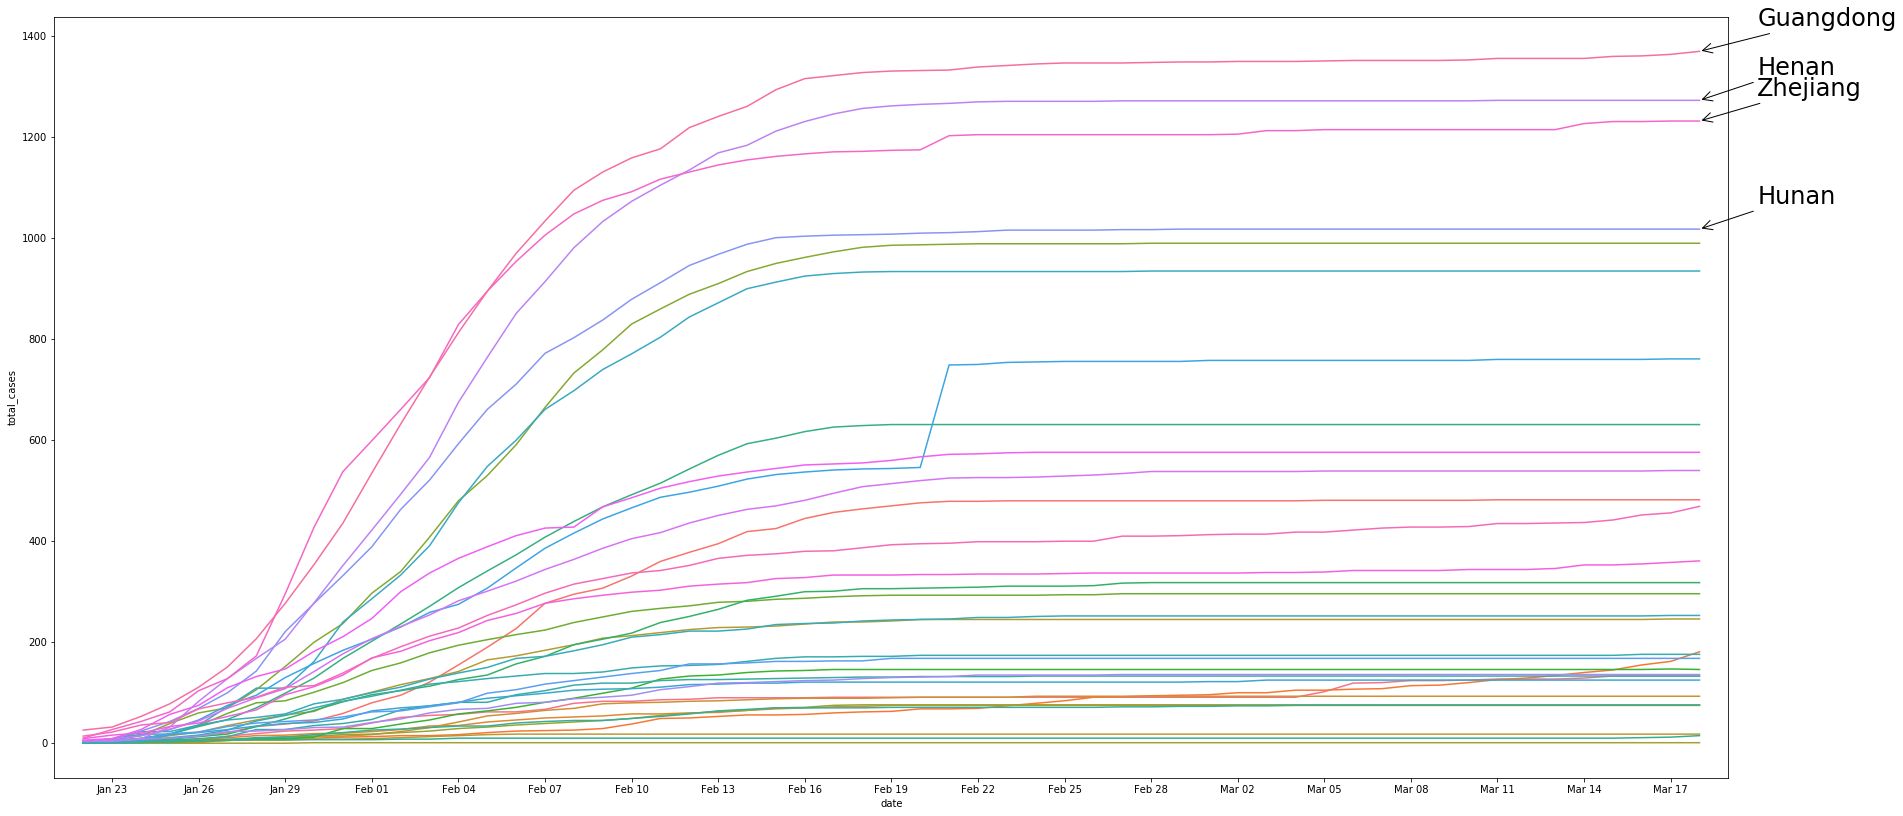

In [763]:
plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="province", legend=False,  data=china_cities)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([china_cities.date.min() - datetime.timedelta(days=1), china_cities.date.max() + datetime.timedelta(days=1)])

for i in range(4):
    ax.annotate(china_cities_highest.iloc[i].province, 
                xy=(china_cities.date.max(), china_cities_highest.iloc[i].total_cases), fontsize=24,
                xytext=(china_cities.date.max() + datetime.timedelta(days=2),
                        china_cities_highest.iloc[i].total_cases + 50), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

In [812]:
world_vs_china = dataset_w_province[dataset_w_province['location'].isin(['Italy', 'Iran', 'Spain', 'Germany', 'China'])]
world_vs_china.location[world_vs_china['location'] == 'China'] = world_vs_china.province[world_vs_china['location'] == 'China']
world_vs_china = world_vs_china[world_vs_china.location != 'Hubei']
world_highest = world_vs_china.nlargest(4, ['date', 'total_cases']).reset_index()

/Users/mohammedalawami/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Italy, Iran, Spain, Germany V.S China Cities ( exluding Hubei )

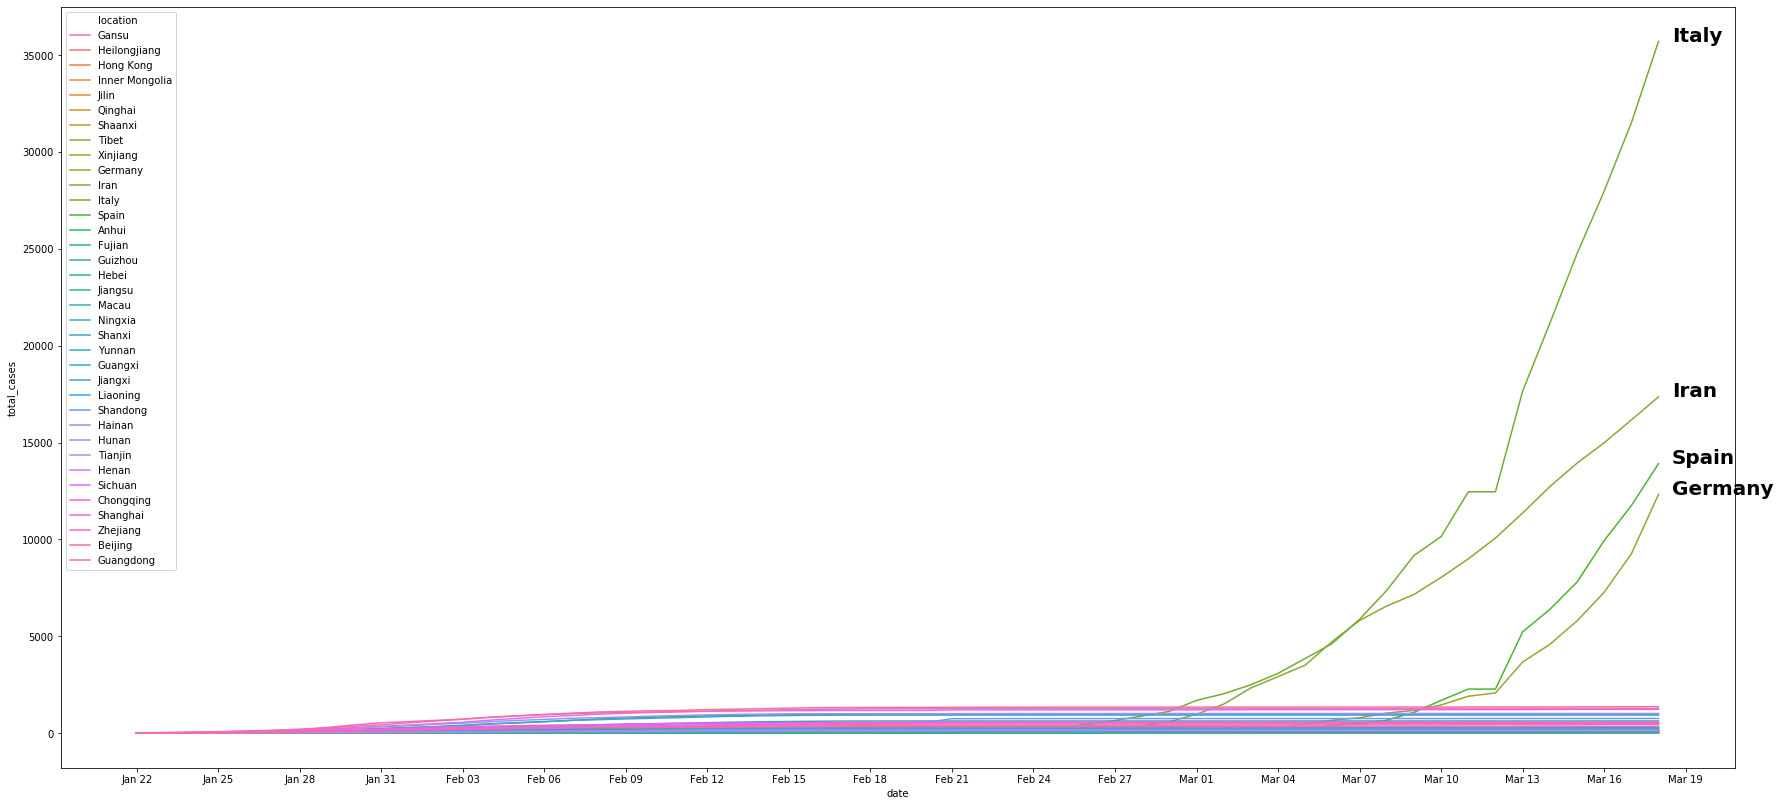

In [814]:



plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location",   data=world_vs_china)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

# ax.set_xlim([world_vs_china.date.min() - datetime.timedelta(days=1), world_vs_china.date.max() + datetime.timedelta(days=1)]);

    
# for i in range(4):
#     ax.annotate(world_highest.iloc[i].location, 
#                 xy=(world_vs_china.date.max(), world_highest.iloc[i].total_cases), fontsize=24,
#                 xytext=(world_vs_china.date.max() + datetime.timedelta(days=2),
#                         world_highest.iloc[i].total_cases + 50), 
#                 arrowprops=dict(facecolor='black', arrowstyle="->"));

for line in range(0,world_highest.shape[0]):
     ax.text(world_highest.date[line] + datetime.timedelta(days=0.5), world_highest.total_cases[line], world_highest.location[line], horizontalalignment='left', size='20', color='black', weight='bold')


In [816]:
gulf_countries = dataset_w_province[dataset_w_province.location.isin(['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates'])]
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()
gulf_highest

,index,province,location,Lat,Long,date,total_cases
0,1026,0,Bahrain,26.0275,50.55,2020-03-18,256
1,10260,0,Saudi Arabia,24.0000,45.00,2020-03-18,171
2,7752,0,Kuwait,29.5000,47.75,2020-03-18,142
3,11628,0,United Arab Emirates,24.0000,54.00,2020-03-18,113


## new source

In [777]:
covid_data = requests.get('https://datacommunitysa.us19.list-manage.com/track/click?u=09b1831b880db155c1219e9a5&id=a02ec1b484&e=b9af93564e')

In [778]:
with open('./covid_data.csv', 'wb') as f:
    f.write(covid_data.content)

In [794]:
covid_data = pd.read_csv('covid_data.csv')
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790


In [795]:
covid_data = covid_data.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], var_name='date', value_name="total_cases")
covid_data = covid_data.rename(columns={"Province/State": "province", "Country/Region": "location"})
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.head()

,location,province,Lat,Long,date,total_cases
0,Thailand,NaN,15.0000,101.0000,2020-01-22,2
1,Japan,NaN,36.0000,138.0000,2020-01-22,2
2,Singapore,NaN,1.2833,103.8333,2020-01-22,0
3,Nepal,NaN,28.1667,84.2500,2020-01-22,0
4,Malaysia,NaN,2.5000,112.5000,2020-01-22,0


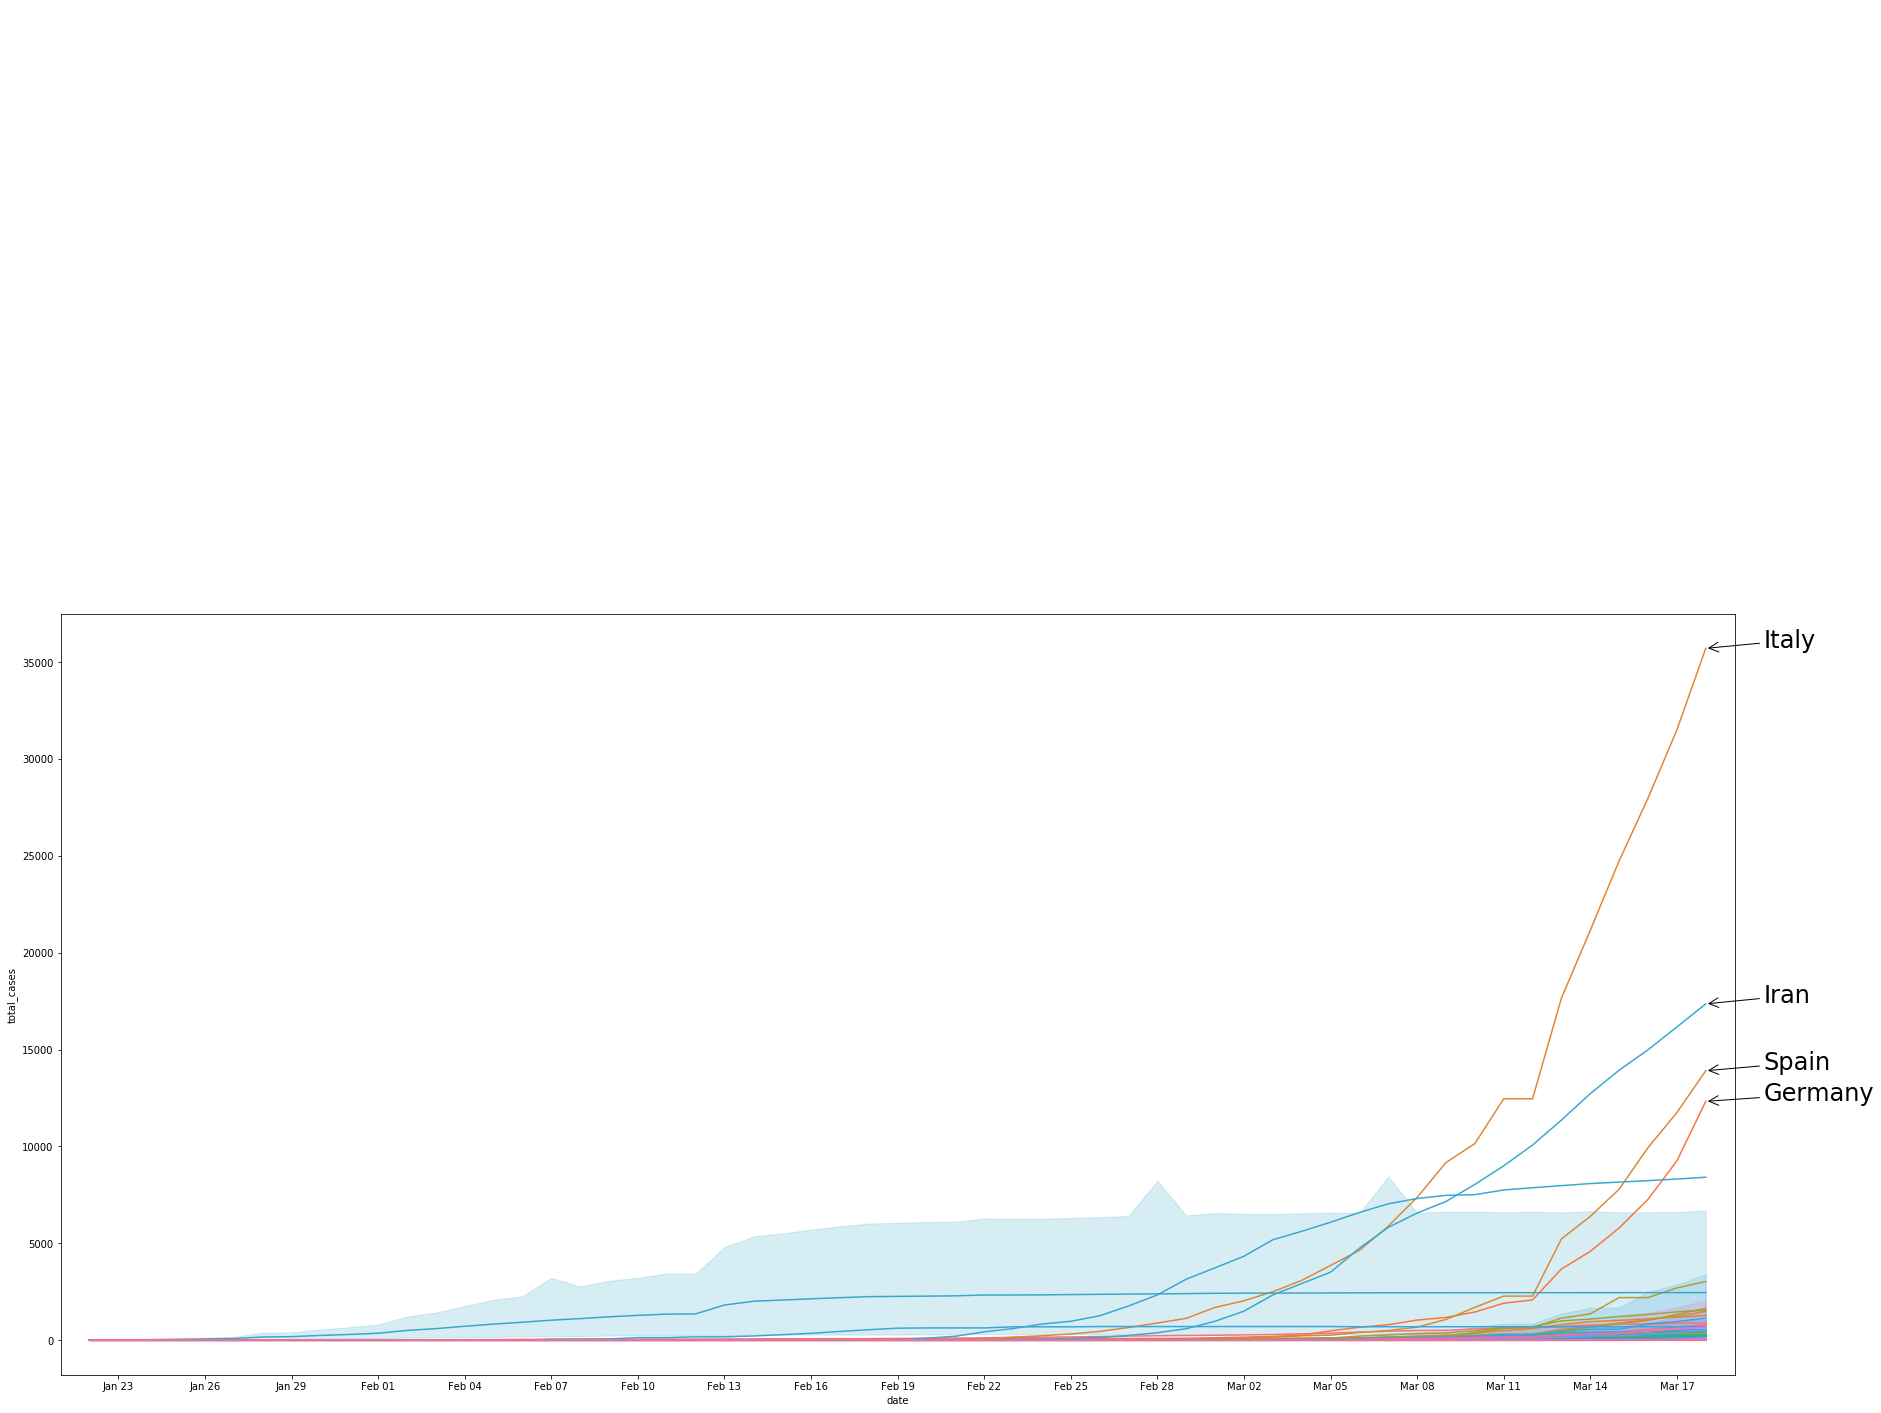

In [811]:
highest = covid_data.nlargest(5, ['date', 'total_cases']).reset_index()


plt.figure(figsize = (30, 14))

ax = sns.lineplot(x="date", y="total_cases", hue="location", legend=False,  data=covid_data)

ax.xaxis_date()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))

ax.set_xlim([covid_data.date.min() - datetime.timedelta(days=1), covid_data.date.max() + datetime.timedelta(days=1)])

for i in range(5):
    ax.annotate(highest.iloc[i].location, 
                xy=(covid_data.date.max(), highest.iloc[i].total_cases), fontsize=24,
                xytext=(covid_data.date.max() + datetime.timedelta(days=2),
                        highest.iloc[i].total_cases + 50), 
                arrowprops=dict(facecolor='black', arrowstyle="->"));

In [815]:
gulf_countries = covid_data[covid_data.location.isin(['Saudi Arabia', 'Kuwait', 'Bahrain', 'United Arab Emirates'])]
gulf_highest = gulf_countries.nlargest(4, ['date', 'total_cases']).reset_index()
gulf_highest

,index,location,province,Lat,Long,date,total_cases
0,25899,Bahrain,NaN,26.0275,50.55,2020-03-18,256
1,25936,Saudi Arabia,NaN,24.0000,45.00,2020-03-18,171
2,25900,Kuwait,NaN,29.5000,47.75,2020-03-18,142
3,25885,United Arab Emirates,NaN,24.0000,54.00,2020-03-18,113
